In [10]:
import numpy as np
import pandas as pd
import os

In [11]:
capa = np.float64(17e-9) #200nm SiO2 capacitance

In [12]:
files = os.listdir(".")
print(files)

['.python-version', '1000_50_1.bmp', '1000_50_1.xls', '100_5_1.bmp', '100_5_1.xls', '200_20_1.bmp', '200_20_1.xls', '500_50_1.bmp', '500_50_1.xls', 'analize.ipynb', 'output curve']


In [13]:
def differ(xarr, yarr) -> np.ndarray:
    dx = np.diff(xarr)
    dy = np.diff(yarr)
    diff = np.zeros((len(xarr)));

    diff[1:] = np.divide(dy, dx)
    diff[0] = diff[1]
    return diff


def calc_mob(w, l, gVgarr, Idarr) -> np.ndarray:
    rootI = np.float64(np.sqrt(Idarr))
    gVgarr = np.float64(gVgarr)
    mob = differ(gVgarr, np.square(rootI))
    mob = mob*np.divide(2*l,w*capa)
    return mob

데이터 모듈화

In [14]:
###data sheet for cell, swiching 곡선 하나
class cell_obj():
    def __init__(self, filename):
        df = pd.read_excel(filename, sheet_name="Data")
        wl = np.float64(filename[:-6].split("_"))
        self.L:np.float64 = wl[1] #channel length
        self.W:np.float64 = wl[0] #channel width
        self.mobility:np.ndarray = calc_mob(self.W, self.L, df["GateV"], df["DrainI"])
        self.gateV:np.ndarray = np.array(df["GateV"])
        self.gateI:np.ndarray = np.array(df["GateI"])
        self.drainI:np.ndarray = np.array(df["DrainI"])

        self.name:str = f"W: {self.W}μm, L: {self.L}μm"
        
    def __str__(self):
        return self.name
    

#data sheet for output curve
class output_curve_obj(): #output curve 파일에서 하나씩 추출
    def __init__(self, i):
        df = pd.read_excel("./output curve/output curve.xls", sheet_name="Data").iloc[:,(i*5+2):(i*5+5)]
        self.time:np.ndarray = np.array(df.iloc[:,0])
        self.drainI:np.ndarray = np.array(df.iloc[:,1])
        self.drainV:np.ndarray = np.array(df.iloc[:,2])
        self.gateV = np.float64(i*10)
        self.name = f"GateV={self.gateV}"
        
    def __str__(self):
        return self.name

df_dict = {}
for file in files:
    if "xls" in file:
        filename = file[:-4]
        df_dict[filename] = cell_obj(file)
output_curves = []
for i in np.arange(5):
    output_curves.append(output_curve_obj(i))
a = output_curves[2].gateV

WARNING *** file size (70824) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (70984) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (70864) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (45265) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (45265) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (45265) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
WARNING *** file size (45265) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero

In [15]:
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import matplotlib.figure as fig

swiching 특성

In [16]:
colorarr = np.array([[18, 234, 255], [125, 120, 255], [225, 79, 202], [134, 229, 127]], dtype=np.float64)/255
col_df = {}
for col, k in zip(colorarr, df_dict.keys()):
    col_df[k] = col
print(col_df)

{'1000_50_1': array([0.07058824, 0.91764706, 1.        ]), '100_5_1': array([0.49019608, 0.47058824, 1.        ]), '200_20_1': array([0.88235294, 0.30980392, 0.79215686]), '500_50_1': array([0.5254902 , 0.89803922, 0.49803922])}


dict_keys(['1000_50_1', '100_5_1', '200_20_1', '500_50_1'])
[38802808.295588106, 104089102.22266687, 42230189.89652131, 25334931.96549098]


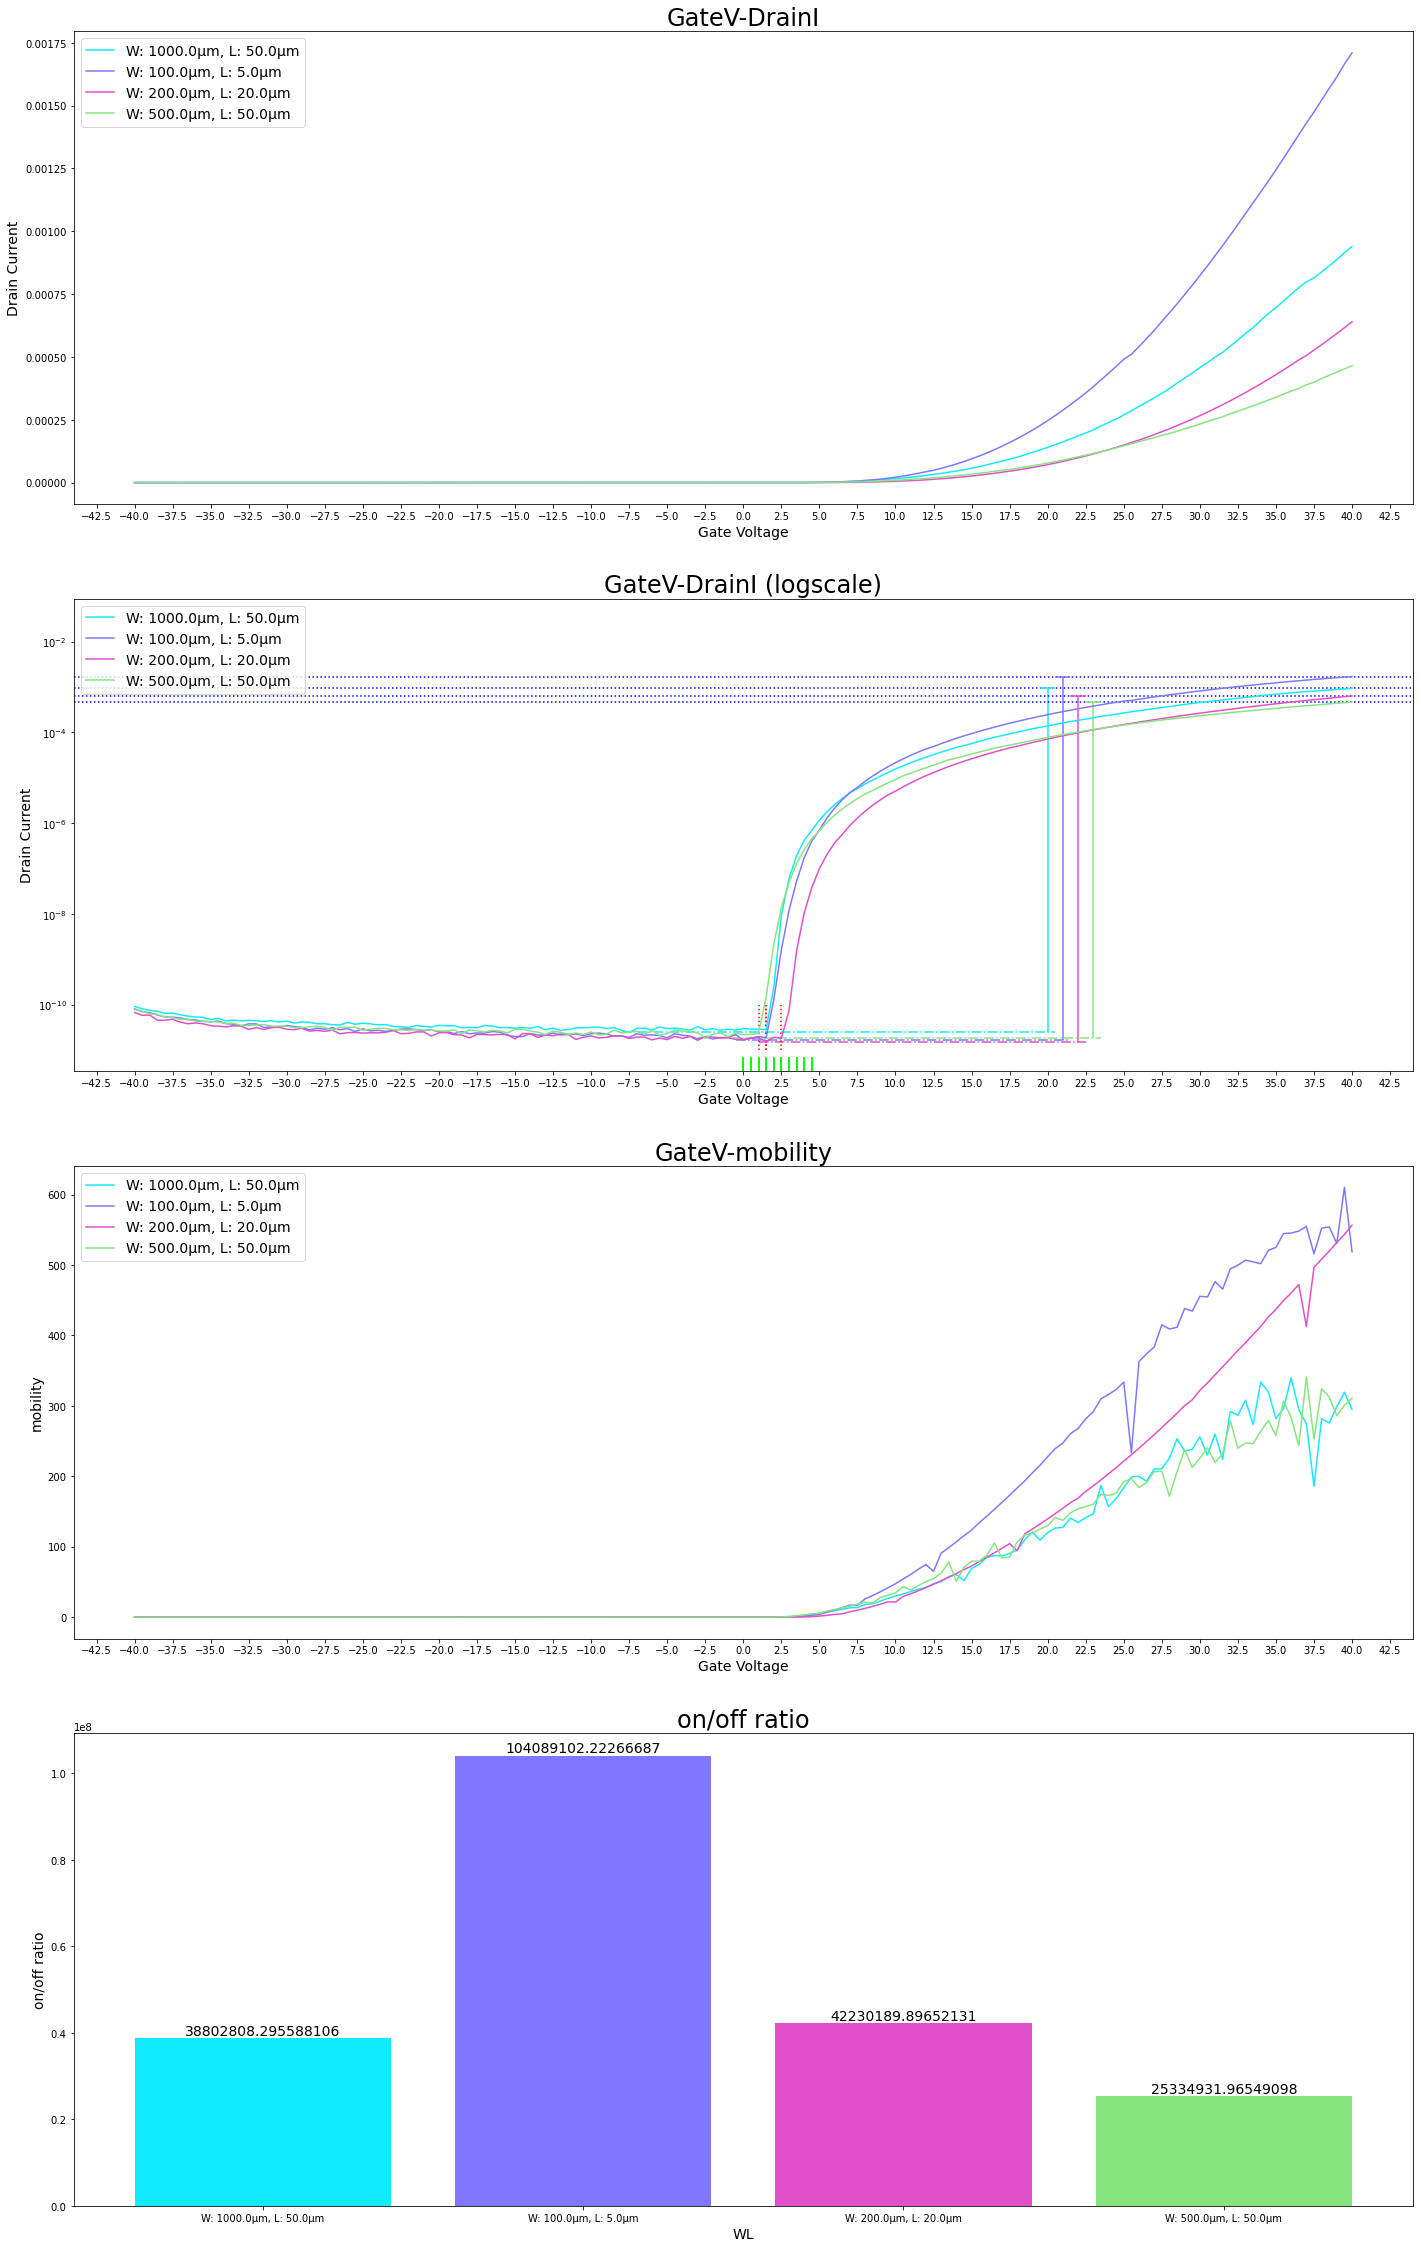

In [18]:
swich_fig, swich_axs = plt.subplots(4,1)

swich_fig.set_figheight(40)
swich_fig.set_figwidth(24)
swich_axs[0].set_xlabel("Gate Voltage", fontsize=14)
swich_axs[0].set_ylabel("Drain Current", fontsize=14)
swich_axs[0].set_xticks(np.arange(-45, 45, 2.5))
swich_axs[0].set_title("GateV-DrainI", fontsize=24)
for key in df_dict.keys():
    Vg = df_dict[key].gateV
    Id = df_dict[key].drainI
    length = len(Vg)

##    Vth = 0
##
##    diff_Id = differ(Vg, Id) 
##    dVg = Vg[2]-Vg[1]
##    on_dId = 0
##    for i in range(length-1):
##        con = np.divide(diff_Id[i+1]-diff_Id[i],diff_Id[i])
##        if Vg[i]>5 and (con<1e-5 and Id[i+1]-Id[i]>0):
##            b = Id[i]-np.dot(diff_Id[i],Vg[i])
##            Vth = np.divide(-b, diff_Id[i])
##            on_dId = diff_Id[i]
##            break
##    Vgth = Vg
##    on_I = Vgth*on_dId + b
##    for i in range(length):
##        if on_I[i]+dVg*on_dId>0:
##            #on_I[i]=0
##            #Vgth[i] = Vth
##            break
##        on_I[i]=0
##    print(dVg, on_dId, Vth)

    swich_axs[0].plot(Vg, Id, label=df_dict[key].name, color=col_df[key])
##    swich_axs[0].plot(Vg, on_I, color=col_df[key], ls="-")
    swich_axs[0].legend(fontsize=14)

onoff= []

swich_axs[1].set_xlabel("Gate Voltage", fontsize=14)
swich_axs[1].set_ylabel("Drain Current", fontsize=14)
swich_axs[1].set_xticks(np.arange(-45, 45, 2.5))
swich_axs[1].set_title("GateV-DrainI (logscale)", fontsize=24)
for key, n in zip(df_dict.keys(), np.arange(4)*2):
    Vg = df_dict[key].gateV
    Id = df_dict[key].drainI
    length = len(Vg)

    diff_Id = differ(Vg, Id)
    for i in range(len(diff_Id)):
        diff_Id[i]
    

    swich_axs[1].hlines(Id[-1], 0, 1, transform=swich_axs[1].get_yaxis_transform(), color="blue", ls=":")
    swich_axs[1].vlines(np.arange(0, 5, 0.5), 0, 0.03, transform=swich_axs[1].get_xaxis_transform(), color=(0, 1, 0, 0.8))
    for i in range(1, len(Id)-1):
        con1 = np.log10(Id[i+1])
        con2 = np.log10(Id[i])
        if Id[i] == min(Id):
            point = 120
            swich_axs[1].vlines(Vg[point+n], Id[i], Id[-1], color=col_df[key])
            swich_axs[1].hlines(Id[i], Vg[i-1], Vg[point+1+n], color=col_df[key], ls="-.")
            swich_axs[1].hlines(Id[-1], Vg[point+n-1], Vg[point+1+n], color=col_df[key])
            onoff.append(np.divide(Id[-1],Id[i]))
        if np.abs(con1-con2)>0.5:
            swich_axs[1].vlines([Vg[i]], 1e-11 ,1e-10, color="red", ls=":")
            break
    swich_axs[1].plot(Vg, Id, label=df_dict[key].name, color=col_df[key])
    swich_axs[1].legend(fontsize=14)
print(df_dict.keys())
print(onoff)

swich_axs[1].set_yscale("log")

swich_axs[2].set_xticks(np.arange(-45, 45, 2.5))
swich_axs[2].set_title("GateV-mobility", fontsize=24)
swich_axs[2].set_ylabel("mobility", fontsize=14)
swich_axs[2].set_xlabel("Gate Voltage", fontsize=14)
for key in df_dict.keys():
    swich_axs[2].plot(df_dict[key].gateV, df_dict[key].mobility, label=df_dict[key].name, color=col_df[key])
    swich_axs[2].legend(fontsize=14)

swich_axs[3].set_title("on/off ratio", fontsize=24)
swich_axs[3].set_ylabel("on/off ratio", fontsize=14)
swich_axs[3].set_xlabel("WL", fontsize=14)
for key, oo in zip(list(df_dict.keys()), onoff):
    name = df_dict[key].name
    swich_axs[3].bar(name, oo, color=col_df[key])
    swich_axs[3].text(name,oo, str(oo), verticalalignment='bottom', horizontalalignment="center", fontsize=14)
    
#datanames = df_dict.keys()
#swich_axs[3].bar(onoff)

W: 1000.0μm, L: 50.0μm 7.315322328430469
W: 100.0μm, L: 5.0μm 5.091859014981239
W: 200.0μm, L: 20.0μm 6.107209579517338
W: 500.0μm, L: 50.0μm 5.4010673499477875


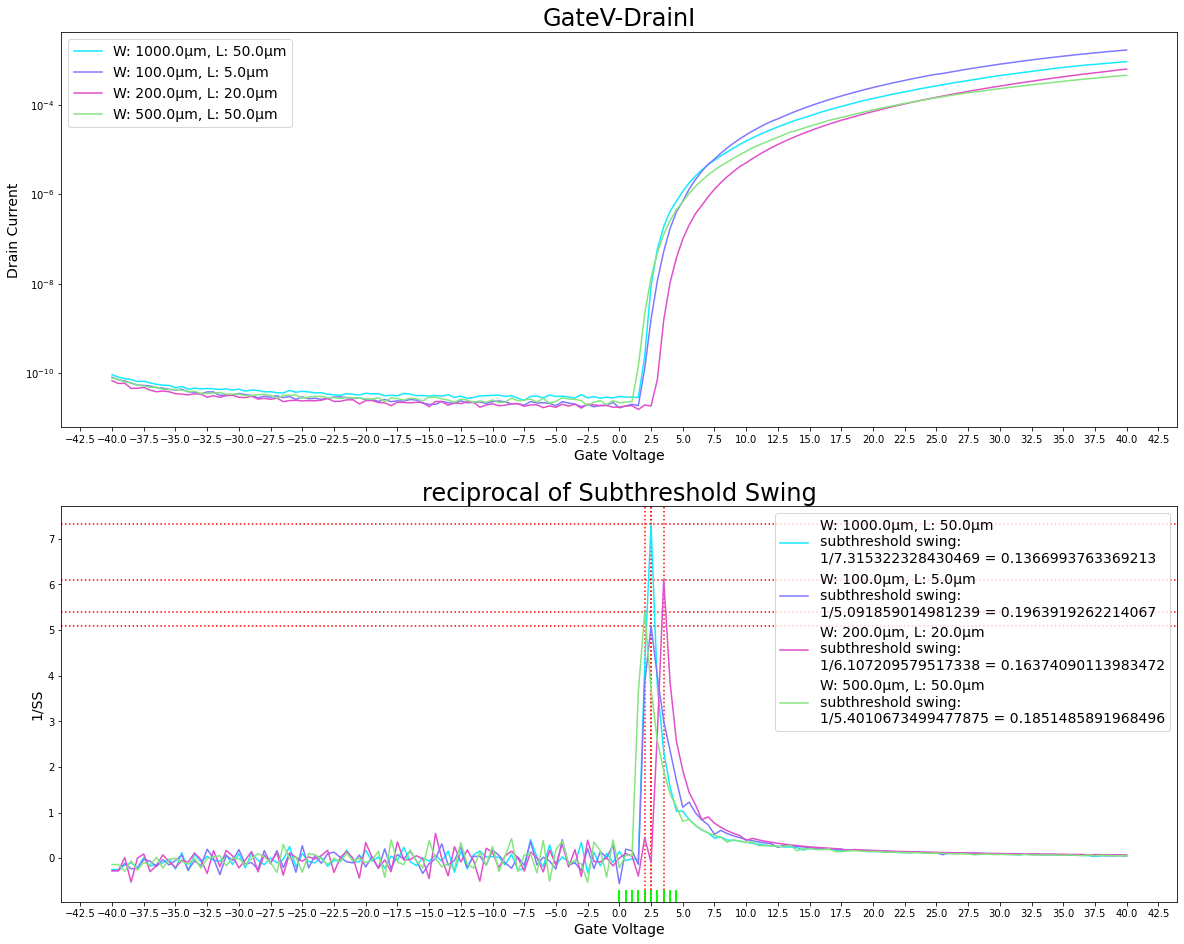

In [29]:
ss_fig, ss_axs = plt.subplots(2,1)
ss_fig.set_figheight(16)
ss_fig.set_figwidth(20)

ss_axs[0].set_xlabel("Gate Voltage", fontsize=14)
ss_axs[0].set_ylabel("Drain Current", fontsize=14)
ss_axs[0].set_xticks(np.arange(-45, 45, 2.5))
ss_axs[0].set_title("GateV-DrainI", fontsize=24)
    
for k in df_dict.keys():
    Vg = df_dict[k].gateV
    Id = df_dict[k].drainI
    ss_axs[0].plot(Vg, Id, label=df_dict[k].name, color=col_df[k])
    ss_axs[0].legend(fontsize=14)
    ss_axs[0].set_yscale("log")

ss_axs[1].set_xlabel("Gate Voltage", fontsize=14)
ss_axs[1].set_ylabel("1/SS", fontsize=14)
ss_axs[1].set_xticks(np.arange(-45, 45, 2.5))
ss_axs[1].set_title("reciprocal of Subthreshold Swing", fontsize=24)
ss_sub = ""
for k in df_dict.keys():
    Vg = df_dict[k].gateV
    Id = df_dict[k].drainI
    ss = differ(Vg, np.log(Id))
    ss_max = 0

    for i in range(len(ss)):
        if ss[i] == max(ss):
            ss_axs[1].vlines([Vg[i]], 0, 1, transform=ss_axs[1].get_xaxis_transform(), color="red", ls=":")
            ss_axs[1].vlines(np.arange(0, 5, 0.5), 0, 0.03, transform=ss_axs[1].get_xaxis_transform(), colors=(0, 1, 0, 0.8))
            ss_axs[1].hlines([ss[i]], 0, Vg[i], transform=ss_axs[1].get_yaxis_transform(), color="red", ls=":")
            ss_max = ss[i]
            print(df_dict[k].name, ss[i])
    ss_axs[1].plot(Vg, ss, label=df_dict[k].name+f"\nsubthreshold swing:\n1/{ss_max} = {np.divide(1,ss_max)}", color=col_df[k])
    ss_axs[1].legend(fontsize=14)



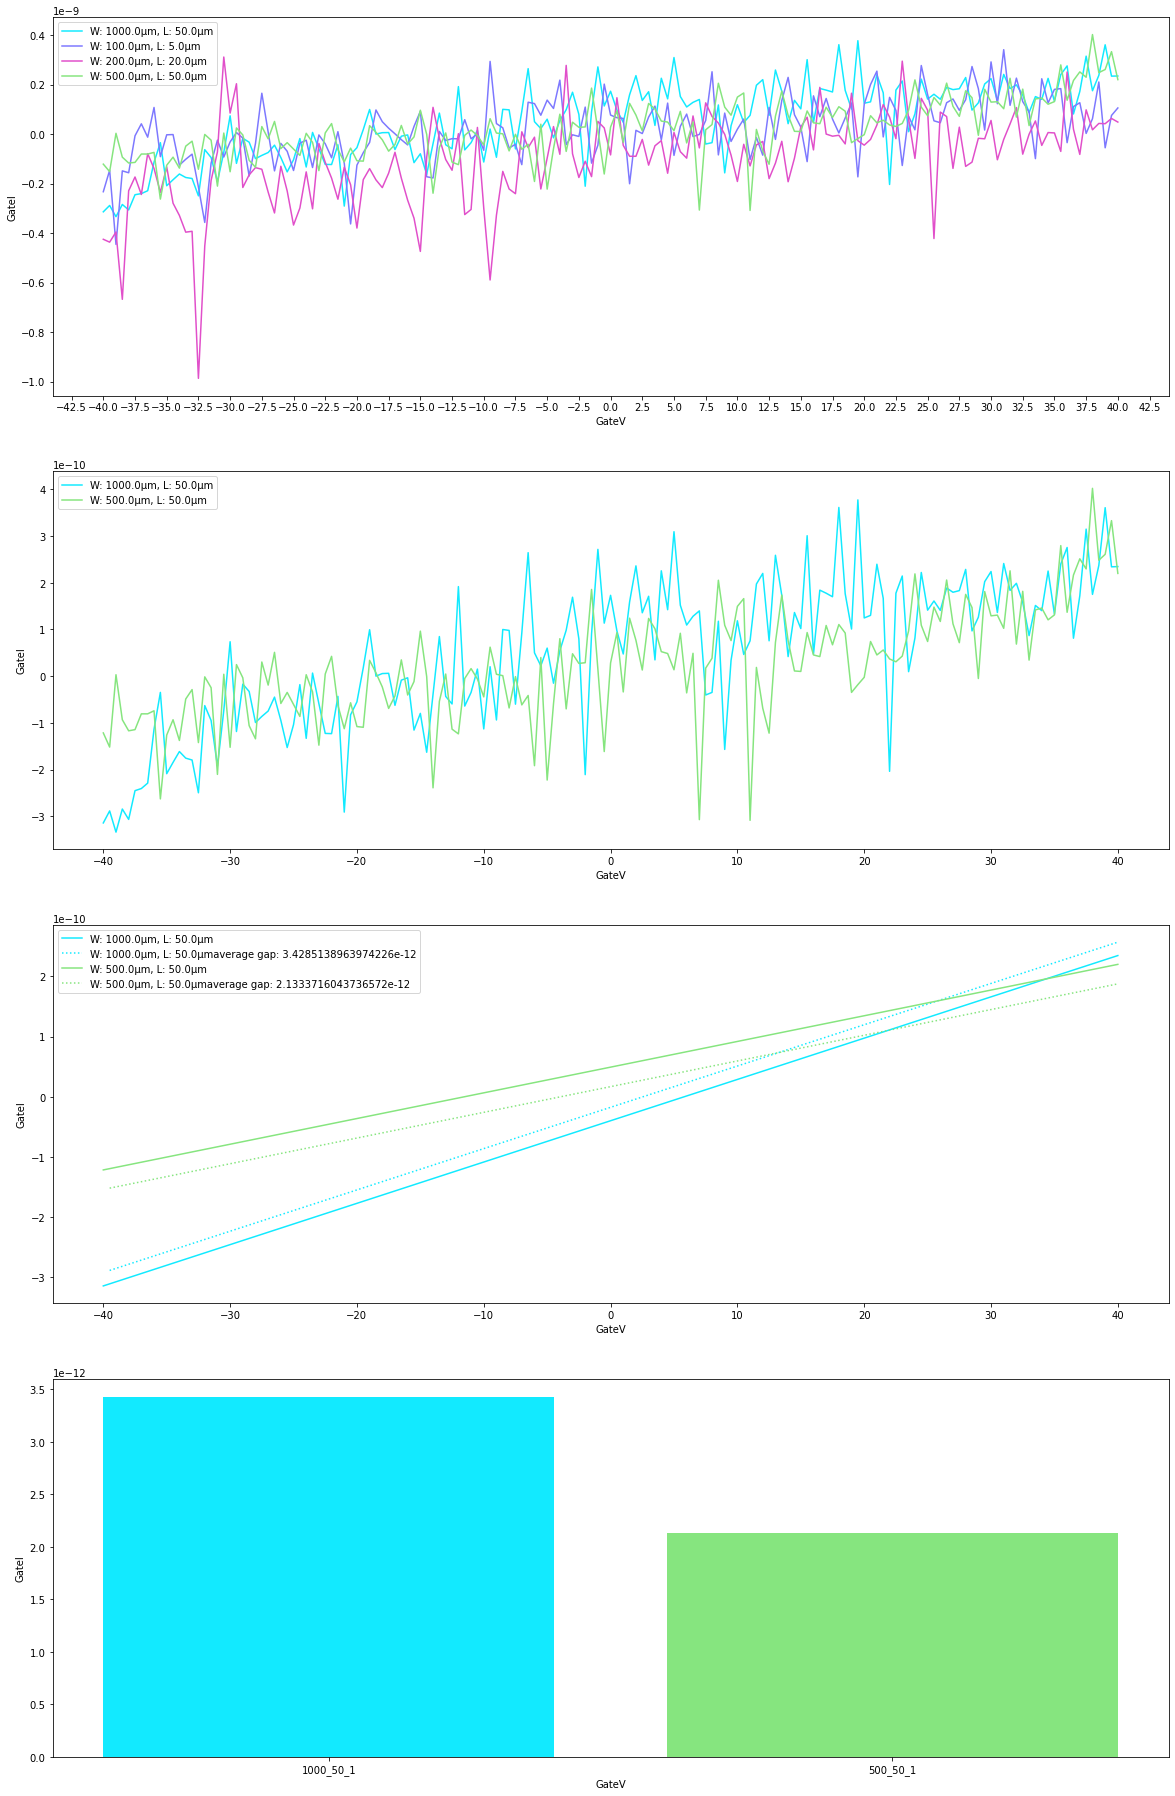

In [34]:
gateI_fig, gateI_axs = plt.subplots(4,1)
gateI_fig.set_figheight(32)
gateI_fig.set_figwidth(20)
gateI_axs[0].set_xticks(np.arange(-45, 45, 2.5))

for i in range(len(gateI_axs)):
    gateI_axs[i].set_ylabel("GateI")
    gateI_axs[i].set_xlabel("GateV")

for key in df_dict.keys():
    gateI_axs[0].plot(df_dict[key].gateV, df_dict[key].gateI, label=df_dict[key].name, color=col_df[key])
    gateI_axs[0].legend()

for key in ["1000_50_1", "500_50_1"]:
    gateI_axs[1].plot(df_dict[key].gateV, df_dict[key].gateI, label=df_dict[key].name, color=col_df[key])
    gateI_axs[1].legend()

for key in ["1000_50_1", "500_50_1"]:
    gateI = np.array(df_dict[key].gateI)
    gateV = df_dict[key].gateV
    average_gap = np.average(np.diff(gateI))
    expect_line1 = np.arange(len(gateI))*average_gap + gateI[0]
    expect_line2 = np.arange(len(gateI)-1)*average_gap + gateI[1]
    gateI_axs[2].plot(gateV, expect_line1, label=df_dict[key].name, color=col_df[key])
    gateI_axs[2].plot(gateV[1:], expect_line2, label=df_dict[key].name+f"average gap: {average_gap}", ls=":", color=col_df[key])
    
    gateI_axs[2].legend()

    gateI_axs[3].bar(key, average_gap, color=col_df[key])



Text(0.5, 1.0, 'Average Different')

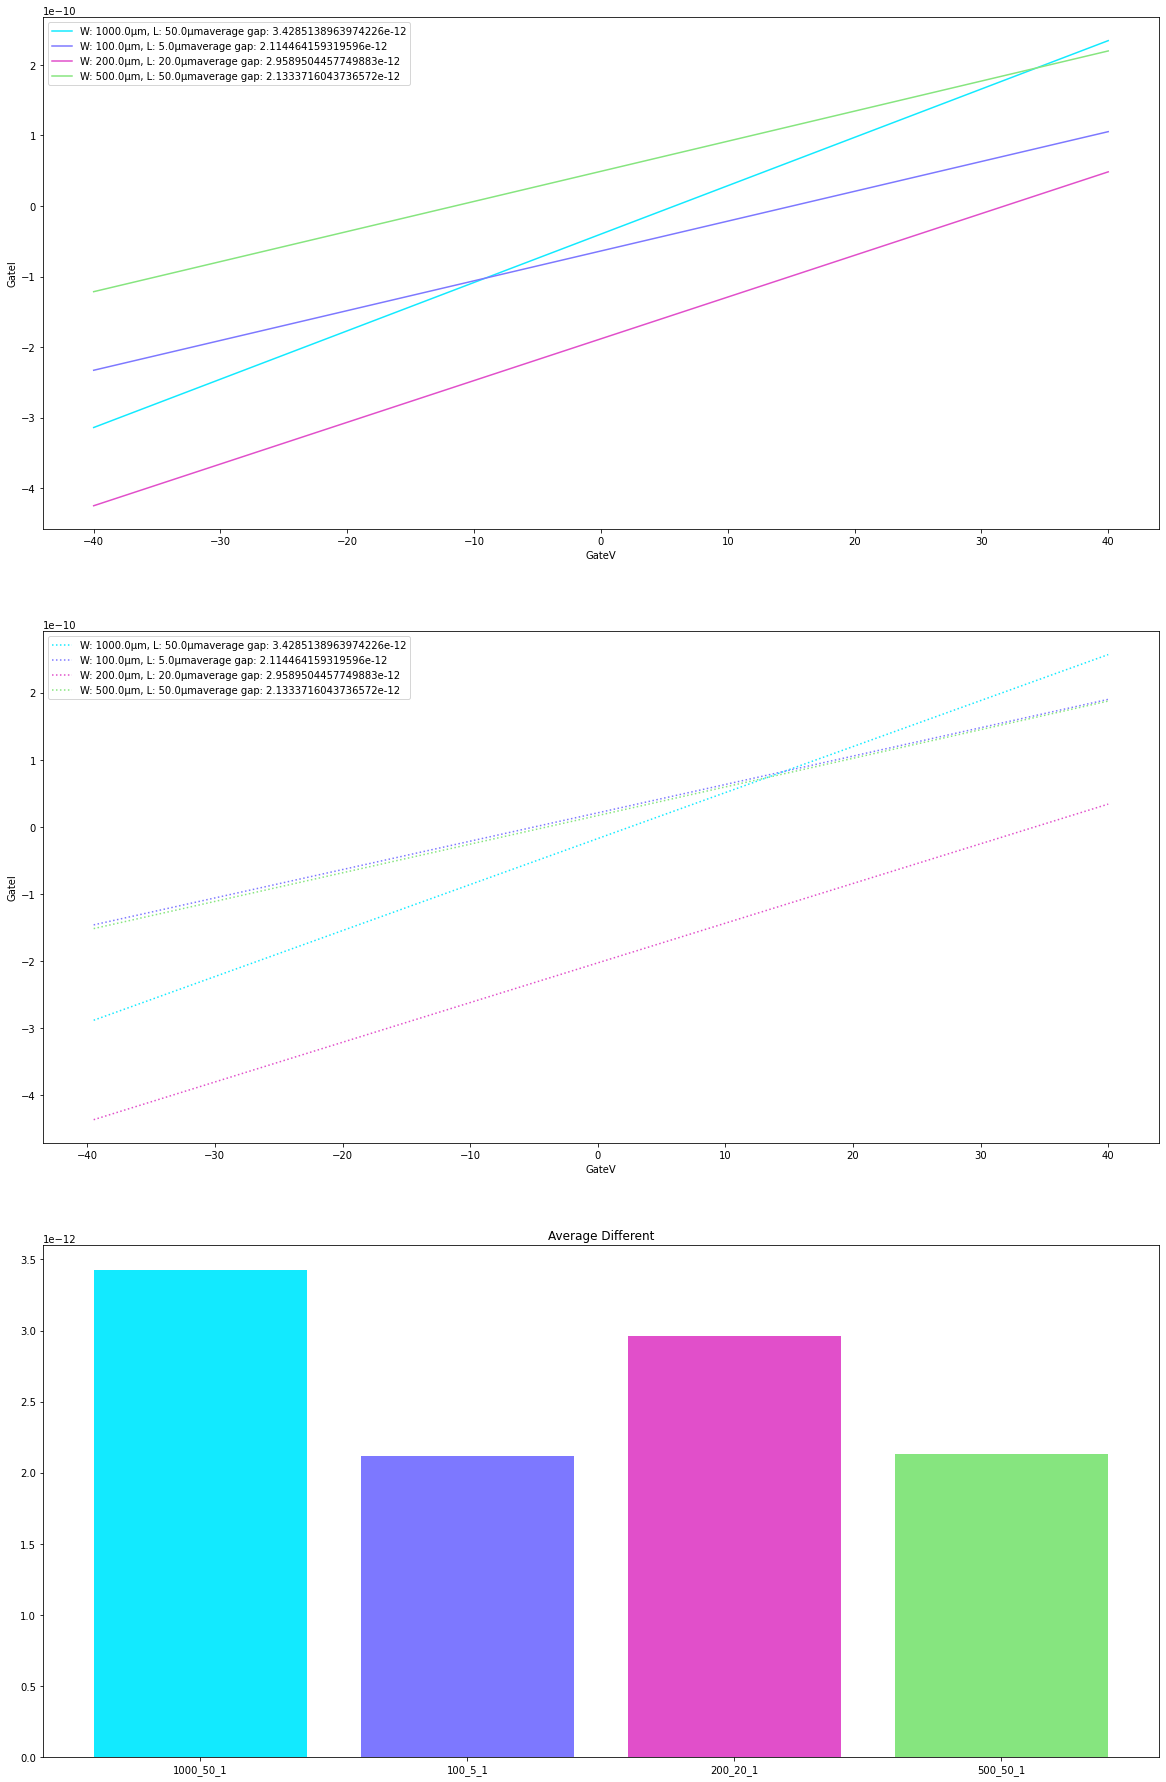

In [38]:
gateI_fig2, gateI_axs2 = plt.subplots(3,1)
gateI_fig2.set_figheight(32)
gateI_fig2.set_figwidth(20)

for i in range(2):
    gateI_axs2[i].set_ylabel("GateI")
    gateI_axs2[i].set_xlabel("GateV")

for key in df_dict.keys():
    gateI = df_dict[key].gateI
    gateV = df_dict[key].gateV
    average_gap = np.average(np.diff(gateI))
    expect_line1 = np.arange(len(gateI))*average_gap + gateI[0]
    expect_line2 = np.arange(len(gateI)-1)*average_gap + gateI[1]
    gateI_axs2[0].plot(gateV, expect_line1, label=df_dict[key].name+f"average gap: {average_gap}", color=col_df[key])
    gateI_axs2[1].plot(gateV[1:], expect_line2, label=df_dict[key].name+f"average gap: {average_gap}", ls=":", color=col_df[key])
    
    gateI_axs2[2].bar(key, average_gap, color=col_df[key])
    
gateI_axs2[0].legend()
gateI_axs2[1].legend()
gateI_axs2[2].set_title("Average Different")

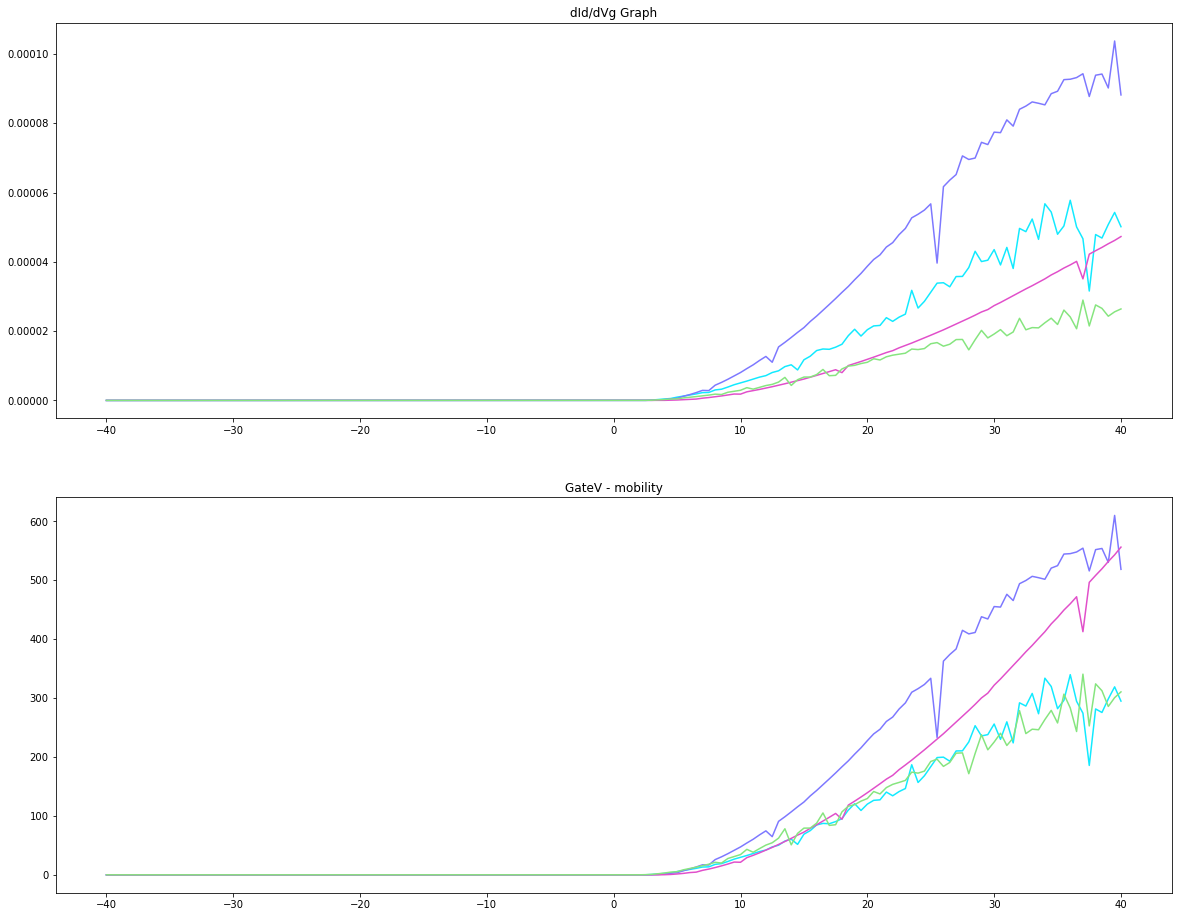

In [41]:
mob_fig, mob_axs = plt.subplots(2,1)
mob_fig.set_figheight(16)
mob_fig.set_figwidth(20)

mob_axs[0].set_title("dId/dVg Graph")
mob_axs[1].set_title("GateV - mobility")
for k in df_dict.keys():
    Vg = df_dict[k].gateV
    Id = df_dict[k].drainI
    diff= differ(Vg, Id)
    mob_axs[0].plot(Vg, diff, color=col_df[k])
    mob_axs[1].plot(Vg,df_dict[k].mobility, color=col_df[k])



    

Text(0.5, 1.0, 'output curve')

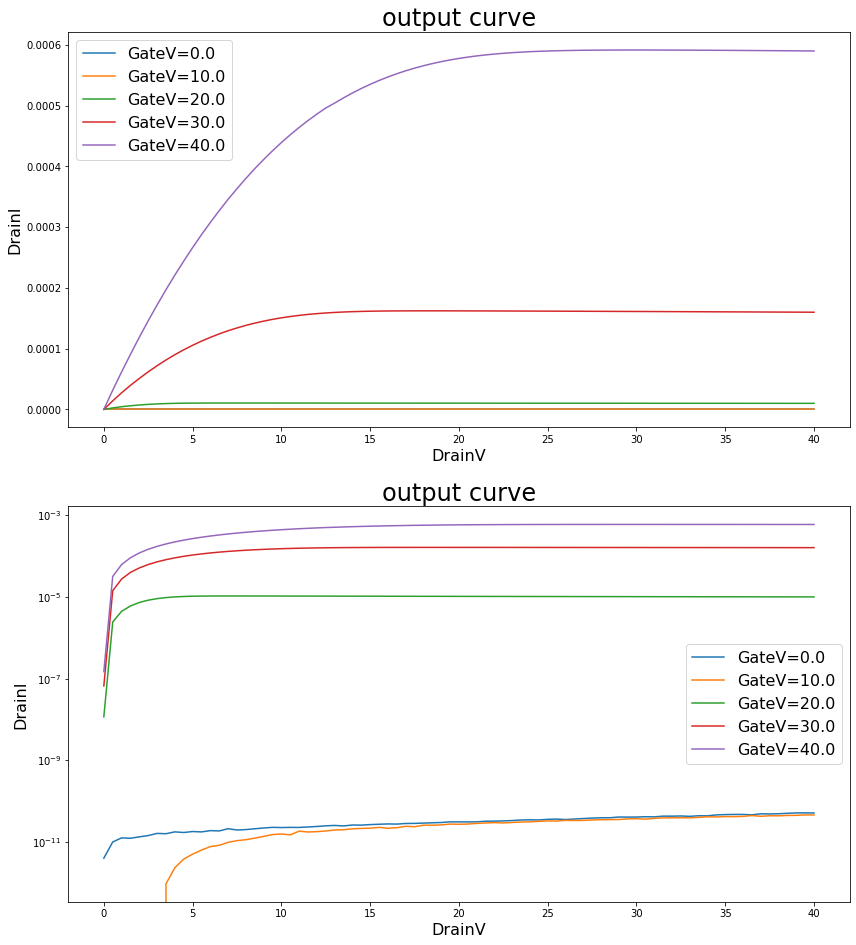

In [43]:
output_fig, output_axs = plt.subplots(2,1)
output_fig.set_figheight(16)
output_fig.set_figwidth(14)

for outc in output_curves:
    output_axs[0].plot(outc.drainV, outc.drainI, label=outc.name)
    output_axs[1].plot(outc.drainV, outc.drainI, label=outc.name)

output_axs[0].set_ylabel("DrainI",fontsize=16)
output_axs[0].set_xlabel("DrainV",fontsize=16)
output_axs[0].legend(fontsize=16)    
output_axs[0].set_title("output curve", fontsize=24)

output_axs[1].set_yscale("log")
output_axs[1].set_ylabel("DrainI",fontsize=16)
output_axs[1].set_xlabel("DrainV",fontsize=16)
output_axs[1].legend(fontsize=16)    
output_axs[1].set_title("output curve", fontsize=24)